In [271]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [272]:
galaxy_sample = '4'
nwalkers = 50
mag_lim = -20

In [273]:
from chains.chain_utils import open_chains, return_parameter_chains, return_final_step
data = open_chains("chains/sample_"+galaxy_sample+"_chain.dat", 50)
nsteps = len(data)//nwalkers
print(nsteps)

339


In [274]:
p1 = return_parameter_chains('col2', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)
p2 = return_parameter_chains('col3', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)
p3 = return_parameter_chains('col4', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)
p4 = return_parameter_chains('col5', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)
p5 = return_parameter_chains('col6', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)
p6 = return_parameter_chains('col7', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)
p7 = return_parameter_chains('col8', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)
p8 = return_parameter_chains('col9', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)
p9 = return_parameter_chains('col10', "chains/sample_"+galaxy_sample+"_chain.dat", nwalkers)

In [275]:
print(np.percentile(p1[:,-1],[16, 50, 84]))
print(np.percentile(p2[:,-1],[16, 50, 84]))
print(np.percentile(p3[:,-1],[16, 50, 84]))
print(np.percentile(p4[:,-1],[16, 50, 84]))
print(np.percentile(p5[:,-1],[16, 50, 84]))
print(np.percentile(p6[:,-1],[16, 50, 84]))
print(np.percentile(p7[:,-1],[16, 50, 84]))
print(np.percentile(p8[:,-1],[16, 50, 84]))
print(np.percentile(p9[:,-1],[16, 50, 84]))

[0.07356073 0.08521    0.09300629]
[0.79881492 0.80179741 0.80482668]
[0.00869257 0.01095926 0.01249883]
[0.0001515  0.00075631 0.00156621]
[0.17007828 0.17253729 0.17810209]
[0.38090261 0.38644772 0.39022041]
[0.01577107 0.01836596 0.02264083]
[0.02581983 0.02861905 0.03161882]
[0.48082067 0.48548301 0.49567013]


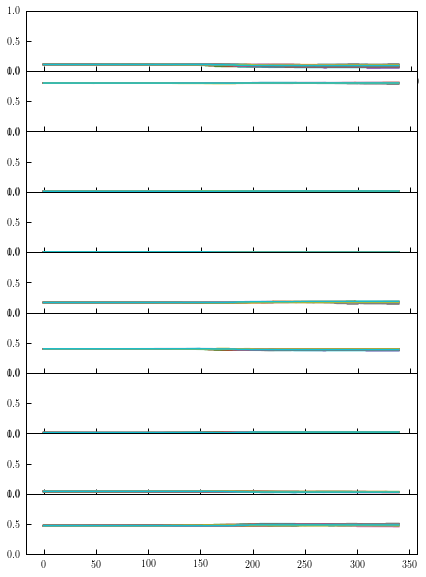

In [276]:
fig, axes = plt.subplots(9, 1, figsize=(7.0,10.0))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(0,nwalkers):
    axes[0].plot(p1[i])
axes[0].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[1].plot(p2[i])
axes[1].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[2].plot(p3[i])
axes[2].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[3].plot(p4[i])
axes[3].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[4].plot(p5[i])
axes[4].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[5].plot(p6[i])
axes[5].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[6].plot(p7[i])
axes[6].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[7].plot(p8[i])
axes[7].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[8].plot(p9[i])
axes[8].set_ylim([0,1])

plt.show()

In [277]:
from make_mock import make_galaxy_sample

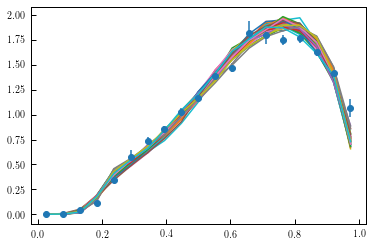

In [278]:
from astropy.table import Table
t_1 = Table.read('../data/sample_'+galaxy_sample+'_shapes.dat', format='ascii')

for i in range(nwalkers):
    j = -1 
    d = {'disk_shape_mu_1_centrals': p1[i,j],
         'disk_shape_mu_2_centrals': p2[i,j],
         'disk_shape_var_1_centrals': p3[i,j],
         'disk_shape_var_2_centrals': p4[i,j],
         'elliptical_shape_mu_1_centrals': p5[i,j],
         'elliptical_shape_mu_2_centrals': p6[i,j],
         'elliptical_shape_var_1_centrals': p7[i,j],
         'elliptical_shape_var_2_centrals': p8[i,j],
         'f_disk': p9[i,j]}
    
    mock = make_galaxy_sample(mag_lim=mag_lim,**d)
    
    # measure shape distribution
    bins = np.linspace(0,1,20)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    mag_key = 'obs_Mag_r'
    mask = (mock[mag_key]<mag_lim) & (mock[mag_key]>(mag_lim-1.0))
    
    x = mock['galaxy_projected_b_to_a']
    counts = np.histogram(x[mask], bins=bins)[0]
    counts = 1.0*counts/np.sum(mask)/np.diff(bins)
    
    plt.plot(bin_centers, counts)
plt.errorbar(t_1['q'],t_1['frequency'],t_1['err'], fmt='o')
plt.show()

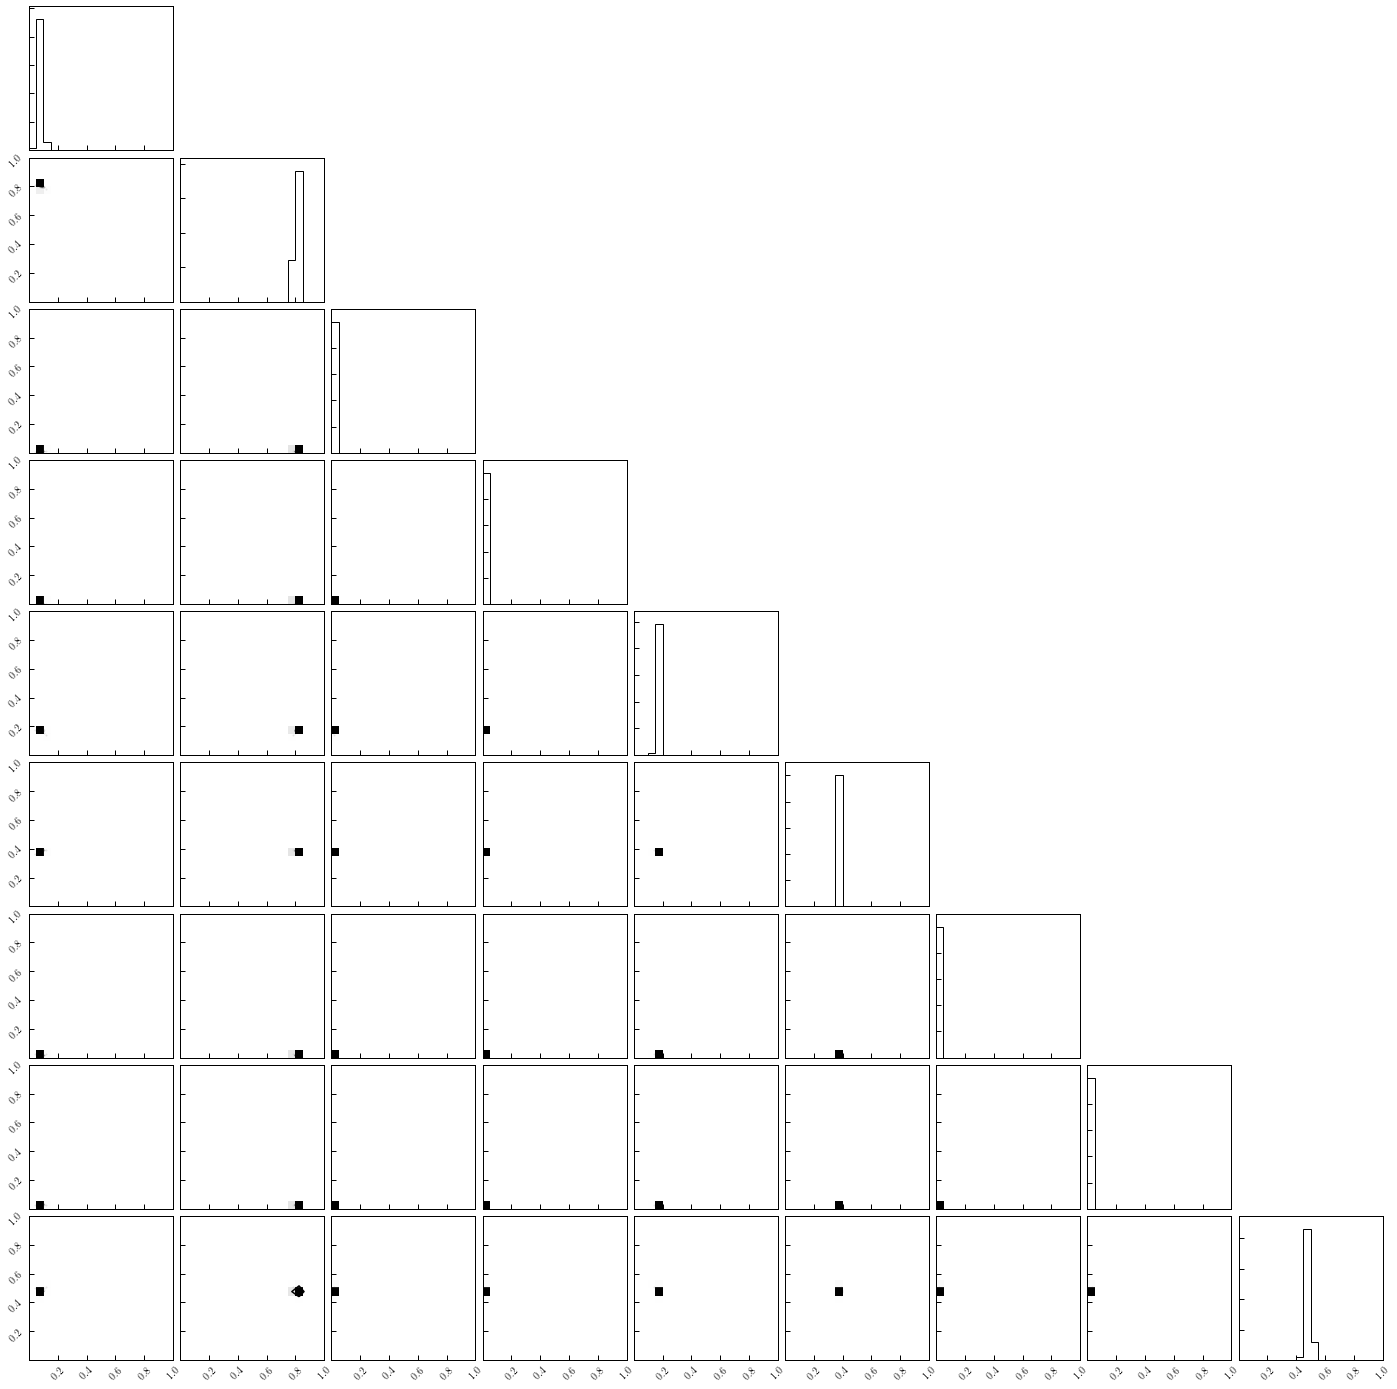

In [279]:
samples = return_final_step("chains/sample_"+galaxy_sample+"_chain.dat", 50)

ranges = [(0,1)]*9

import corner
fig = corner.corner(samples, range=ranges)

plt.show()